# Linear Regression Model for Predicting House Prices

## Task Objective: Based on the us_housing.csv data, establish a linear regression model to predict reasonable house prices.

1. Use area as the input variable to build a single-factor model, evaluate the model's performance, and visualize the results of the linear evaluation model.

2. Use income, housing age, number of rooms, population, and area as input variables to build a multi-factor model and evaluate its performance.

3. Predict reasonable house prices when income = 65000, housing age = 5 years old, number of rooms = 5, and population = 30000.

In [1]:
# import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'USA_Housing.csv'
df = pd.read_csv(filename, encoding='utf-8')
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
df.describe()
# fig = plt.figure(figsize=(10, 10))
# plt.scatter(df['Avg. Area House Age'], df['Price'])
# plt.title("Average House Age VS Price")
# plt.xlabel("Average Area House Age")
# plt.ylabel("Price")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


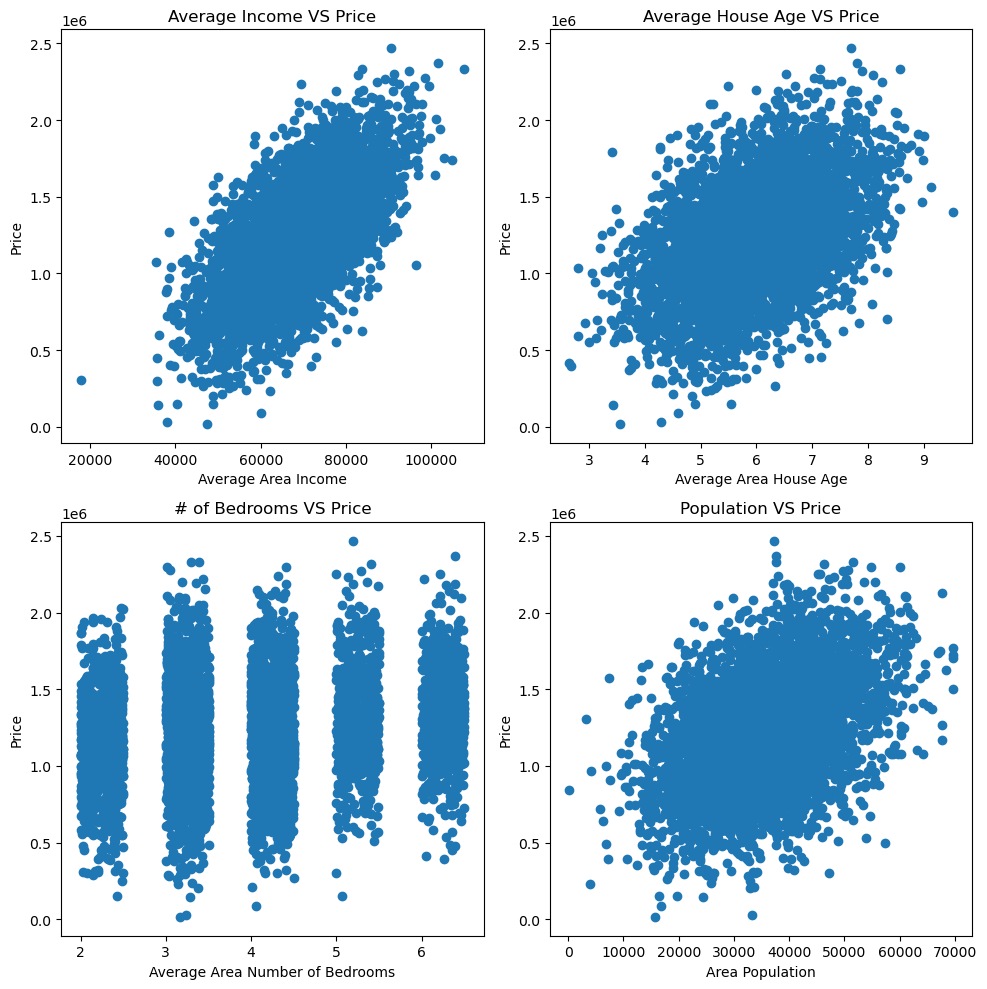

In [5]:
# Visualize the relationship between each variable and price

# Create a figure and set the size
fig = plt.figure(figsize=(10, 10))

# Plot Average Income VS Price
fig1 = plt.subplot(221)
plt.scatter(df['Avg. Area Income'], df['Price'])
plt.title("Average Income VS Price")
plt.xlabel("Average Area Income")
plt.ylabel("Price")

# Plot Average House Age VS Price
fig2 = plt.subplot(222)
plt.scatter(df['Avg. Area House Age'], df['Price'])
plt.title("Average House Age VS Price")
plt.xlabel("Average Area House Age")
plt.ylabel("Price")

# Plot Number of Bedrooms VS Price
fig3 = plt.subplot(223)
plt.scatter(df['Avg. Area Number of Bedrooms'], df['Price'])
plt.title("# of Bedrooms VS Price")
plt.xlabel("Average Area Number of Bedrooms")
plt.ylabel("Price")

# Plot Population VS Price
fig4 = plt.subplot(224)
plt.scatter(df['Area Population'], df['Price'])
plt.title("Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Single-factor Model

In [7]:
x = df["Avg. Area Income"]
y = df["Price"]
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [8]:
# Transfer into array
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
# x.shape
y.shape

(5000, 1)

In [9]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

# Train the model
lr1.fit(x, y)

LinearRegression()

In [10]:
# Calculate the price vs Income
y_predict_1 = lr1.predict(x)
print(y_predict_1)

[[1464424.9504096 ]
 [1458133.78934377]
 [1077429.52283635]
 ...
 [1122016.75893299]
 [1219741.59365632]
 [1166948.95599714]]


In [12]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(y, y_predict_1)
# R2 Score 越接近1越好
r2_1 = r2_score(y, y_predict_1)
print(mse_1, r2_1)

73645940735.18944 0.4092593070338846


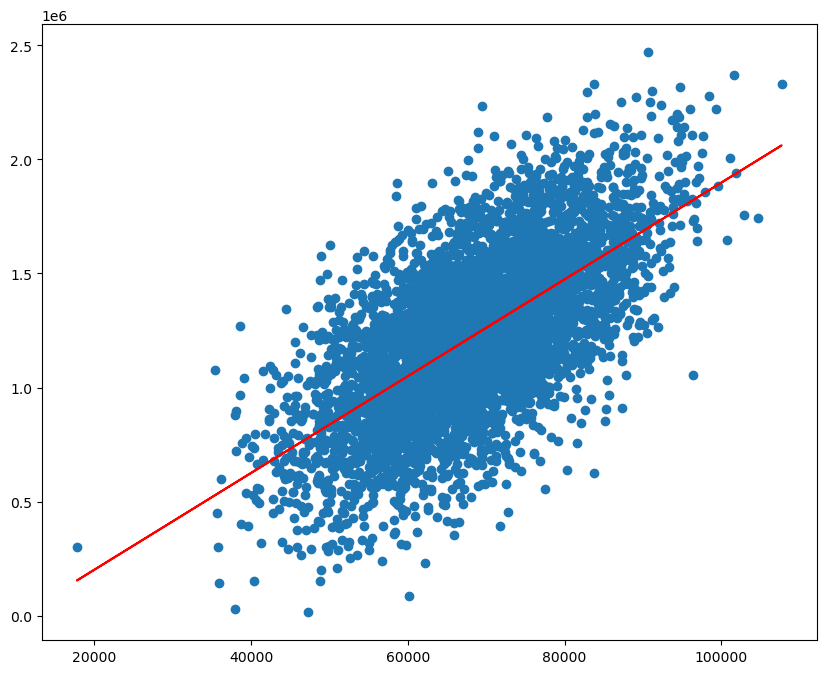

In [13]:
# Visualize the prediction results
fig5 = plt.figure(figsize=(10, 8))

plt.scatter(x, y, label='Actual data')
plt.plot(x, y_predict_1, color="red", label='Predicted data')
plt.show()

# 多因子模型

In [15]:
# Define x_multi
x_multi = df.drop(columns=['Price', 'Avg. Area Number of Rooms', 'Address'])
x_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,4.09,23086.800503
1,79248.642455,6.002900,3.09,40173.072174
2,61287.067179,5.865890,5.13,36882.159400
3,63345.240046,7.188236,3.26,34310.242831
4,59982.197226,5.040555,4.23,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,3.46,22837.361035
4996,78491.275435,6.999135,4.02,25616.115489
4997,63390.686886,7.250591,2.13,33266.145490
4998,68001.331235,5.534388,5.44,42625.620156


In [28]:
# Set up 2nd Linear_model
lr_multi = LinearRegression()

#train the model
lr_multi.fit(x_multi, y)

LinearRegression()

In [17]:
# Make prediction
y_predict_multi = lr_multi.predict(x_multi)
print(y_predict_multi)

[[1222272.17144936]
 [1483428.58394672]
 [1123299.0649148 ]
 ...
 [1198360.15380879]
 [1315000.21841156]
 [1331766.2446476 ]]


In [18]:
# Evaluate the prediction
mse_1 = mean_squared_error(y, y_predict_multi)
# R2 Score 越接近1越好
r2_1 = r2_score(y, y_predict_multi)
print(mse_1, r2_1)

21782998571.906944 0.8252707000170127


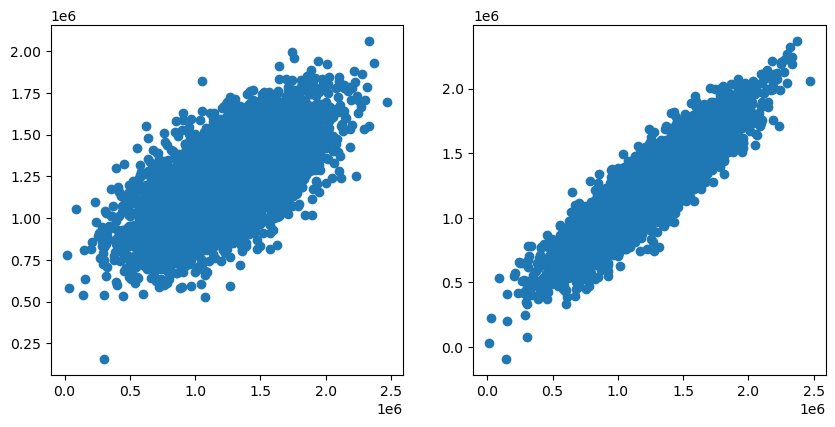

In [24]:
# Visualize the prediction results

fig6 = plt.figure(figsize=(10, 10))

# Compare the results of the single-factor model and the multi-factor model.
fig7 = plt.subplot(221)
plt.scatter(y, y_predict_1)
# plt.title("Single-factor Model")

fig8 = plt.subplot(222)
plt.scatter(y, y_predict_multi)
# plt.title("Multi-factor Model")

plt.show()

## Reasonable Housing Price Prediction 

In [26]:
# Prepare the test data
x_test = [65000, 5, 5, 3000]
x_test = np.array(x_test).reshape(1, -1)

x_test

array([[65000,     5,     5,  3000]])

In [31]:
# Predict the price
y_predict_test = lr_multi.predict(x_test)
y_predict_test

/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[534383.09179747]])